In [7]:
from sklearn.datasets import fetch_openml

In [8]:
mnist=fetch_openml('mnist_784',version=1)

In [9]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [10]:
x,y=mnist['data'],mnist['target']

In [11]:
x.shape

(70000, 784)

In [12]:
y.shape

(70000,)

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
some_digit=x[0]
some_digit_image=some_digit.reshape(28,28)

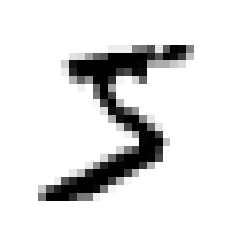

In [15]:
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [16]:
y[0]

'5'

In [17]:
import numpy as np
y=y.astype(np.uint8)

In [18]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [19]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [20]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
sgd_clf.predict([some_digit])

array([ True])

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [23]:
skfolds=StratifiedKFold(n_splits=3,random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [24]:
for train_index,test_index in skfolds.split(x_train,y_train_5):
    clone_clf=clone(sgd_clf)
    x_train_folds=x_train[train_index]
    y_train_folds=y_train_5[train_index]
    x_test_fold=x_train[test_index]
    y_test_fold=y_train_5[test_index]
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred=clone_clf.predict(x_train_folds)
    y_pred=clone_clf.predict(x_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
y_train_pred=cross_val_score(sgd_clf,x_train,y_train,y_train_5,cv=3,scoring='accuracy')

In [27]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [29]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [30]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311